# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Task 1: Import Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.0.0


# Task 2: Rotation

In [2]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40
)

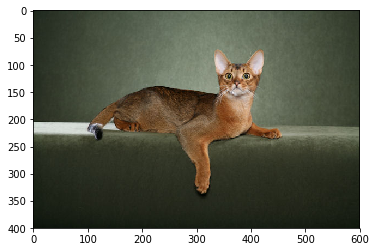

In [4]:
image_path = 'C:/Users/JP/Downloads/dw3BS3FqQXiNwUtxavF4Ng_5451e8c3fea6410999a3107012e98a33_Complete-Notebook---Data-Augmentation/images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


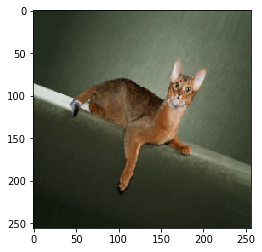

In [5]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [6]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-40, -20, 0, 20, 40],
    height_shift_range=[-50,50]
)

Found 1 images belonging to 1 classes.


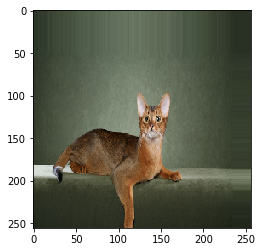

In [7]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 1 classes.


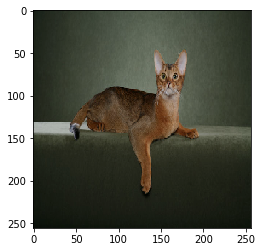

In [8]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0., 2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


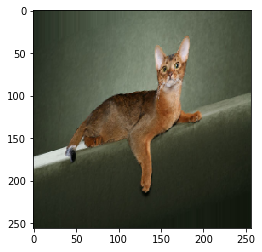

In [9]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=45
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 1 classes.


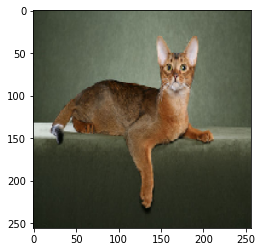

In [10]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.5
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 1 classes.


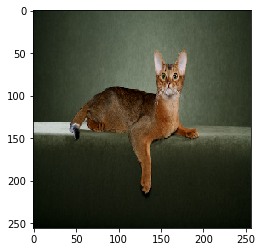

In [11]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 8: Flips

Found 1 images belonging to 1 classes.


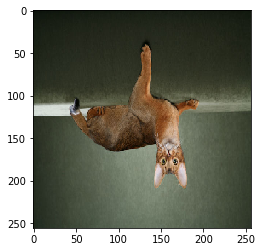

In [12]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
)

generator.fit(x_train)

170500096/170498071 [==============================] - 70s 0us/step


In [14]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.9507923 0.38162872 [[6]]
120.70756512369792


### Samplewise

In [15]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

4.718701e-08 0.99999994 [[6]]


# Task 10: Rescale and Preprocessing Function

In [16]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rescale=1.
)

In [17]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [18]:
print(x.mean(), x.std(), y)

-0.3825827 0.46497342 [[6]]


# Task 11: Using in Model Training

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, input_shape=(32, 32, 3), pooling='max'),
    tf.keras.layers.Dense(64, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\JP\Anaconda3\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [26]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=30, epochs=20
)

Train for 30 steps
Epoch 1/20
30/30 [==============================] - 27s 906ms/step - loss: 3.2456 - accuracy: 0.2042
Epoch 2/20
30/30 [==============================] - 19s 627ms/step - loss: 2.3182 - accuracy: 0.3365
Epoch 3/20
30/30 [==============================] - 16s 530ms/step - loss: 2.0140 - accuracy: 0.3771
Epoch 4/20
30/30 [==============================] - 18s 584ms/step - loss: 1.8999 - accuracy: 0.3896
Epoch 5/20
30/30 [==============================] - 14s 464ms/step - loss: 1.7783 - accuracy: 0.4323
Epoch 6/20
30/30 [==============================] - 21s 683ms/step - loss: 1.5874 - accuracy: 0.4708
Epoch 7/20
30/30 [==============================] - 14s 467ms/step - loss: 1.5611 - accuracy: 0.4958
Epoch 8/20
30/30 [==============================] - 14s 451ms/step - loss: 1.3652 - accuracy: 0.5198
Epoch 9/20
30/30 [==============================] - 15s 512ms/step - loss: 1.4089 - accuracy: 0.5312
Epoch 10/20
30/30 [==============================] - 15s 495ms/step - lo